# Godunov scheme
_Gilbert François Duivesteijn_


This notebook shows the Godunov scheme for most situations at cell face $x_{i+\frac{1}{2}}$ with inputs $u_i$ and $u_{i+1}$.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plot_flux(ul, ur, fL, fR, f):
    uLR = np.linspace(ul, ur, 100)
    fLR = flux(uLR)
    plt.figure(figsize=(5,5))
    plt.plot([-0.5], [fL], "o", color="red")
    plt.plot([0.5], [fR], "o", color="red")
    plt.plot(np.linspace(-0.5, 0.5, 100), fLR, "--", color="red", label="$f(u)$")
    plt.bar([-0.5, 0.5], [ul[0], ur[0]], width=1.0, alpha=0.1, color="blue")
    plt.plot([-1, 0], [ul, ul], "o-", color="blue", alpha=0.5, label="$u$")
    plt.plot([0, 1], [ur, ur], "o-", color="blue", alpha=0.5)
    plt.plot([-0.5, 0.5], [f, f], "-.", color="black", label="$f_{i+1/2}$")
    plt.plot(0, f, "x", color="black")
    plt.xlim(-1.2,1.2)
    plt.ylim(-3,3)
    axs = plt.gca()
    axs.spines['left'].set_position('zero')
    axs.spines['right'].set_color('none')
    axs.spines['bottom'].set_position('zero')
    axs.spines['top'].set_color('none')
    plt.legend()
    plt.show()

    
def print_flux(ul, ur, fL, fR, f):
    print(f"         u_left: {ul[0]:0.2f}")
    print(f"        u_right: {ur[0]:0.2f}")
    print(f"      Flux_left: {fL[0]:0.2f}")
    print(f"     Flux_right: {fR[0]:0.2f}")
    print()
    if ul <= 0 and ur > 0:
        print(f"ul ≤ 0 & ur > 0: Flux_min")
    elif ul > ur:
        print(f"        ul > ur: max(Flux_left, Flux_right)")
    elif ul <= ur:
        print(f"        ul ≤ ur: min(Flux_left, Flux_right)")
    print()
    print(f"     Flux_i+1/2: {f[0]:0.2f}")
               

def flux(u):
    # Burgers' flux
    return u**2 / 2


def godunov(ul, ur, with_plot=False):
    # Flux left and right from the cell interface
    fL = flux(ul)
    fR = flux(ur)
    f_min = 0
    f = np.ones_like(ul, dtype="float")
    # Flux goes to the right
    f[ul > ur] = np.maximum(fL[ul > ur], fR[ul > ur])
    # Flux goes to the left
    f[ul <= ur] = np.minimum(fL[ul <= ur], fR[ul <= ur])
    # Minimum flux at u*
    f[np.where((ul <= 0) & (ur > 0))] = f_min
    
    if with_plot:
        plot_flux(ul, ur, fL, fR, f)
        print_flux(ul, ur, fL, fR, f)

<IPython.core.display.Javascript object>


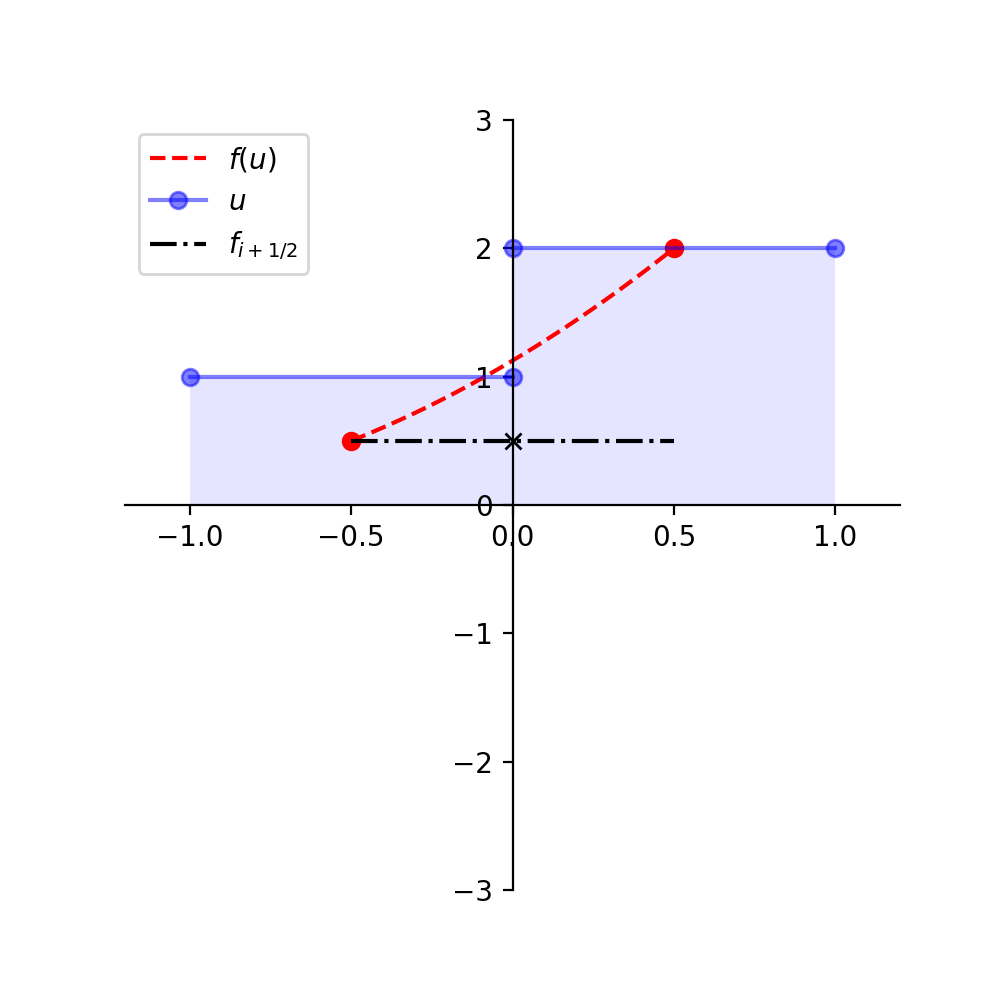

         u_left: 1.00
        u_right: 2.00
      Flux_left: 0.50
     Flux_right: 2.00

        ul ≤ ur: min(Flux_left, Flux_right)

     Flux_i+1/2: 0.50


In [3]:
ul = np.array([1])
ur = np.array([2])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


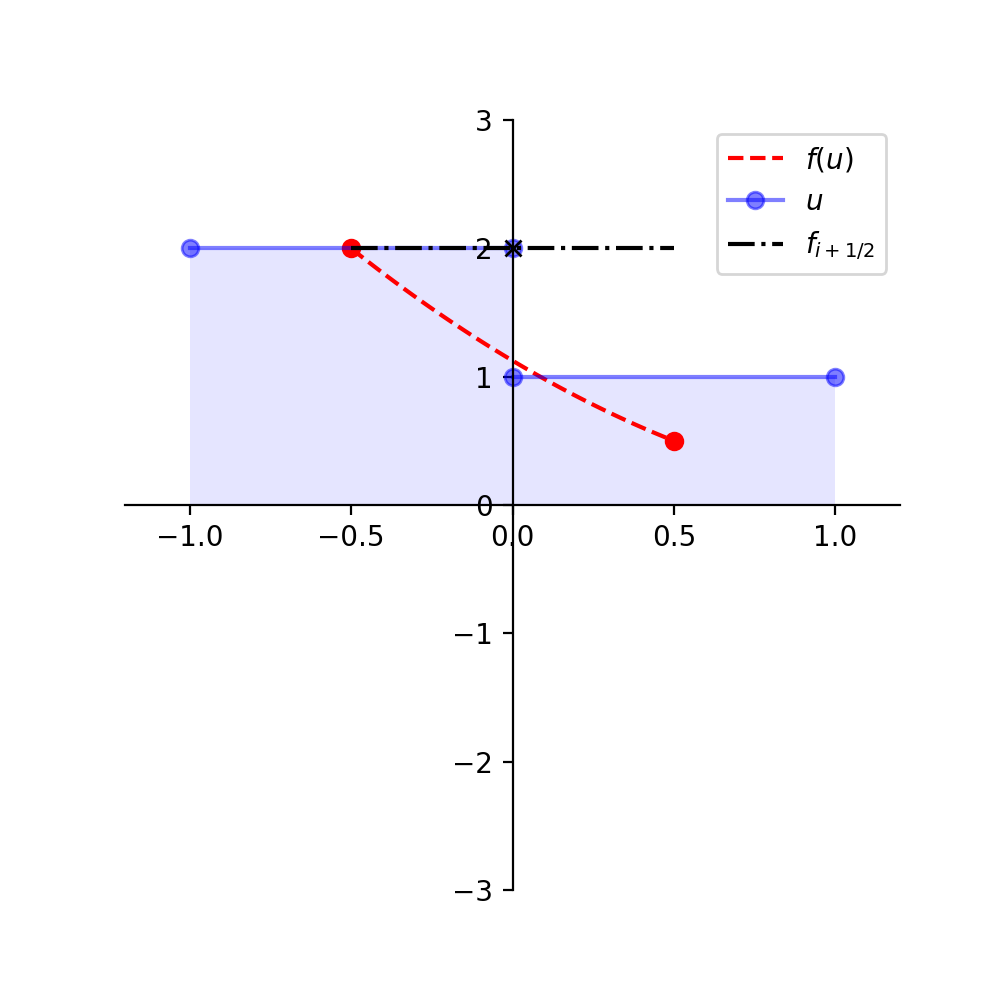

         u_left: 2.00
        u_right: 1.00
      Flux_left: 2.00
     Flux_right: 0.50

        ul > ur: max(Flux_left, Flux_right)

     Flux_i+1/2: 2.00


In [4]:
ul = np.array([2])
ur = np.array([1])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


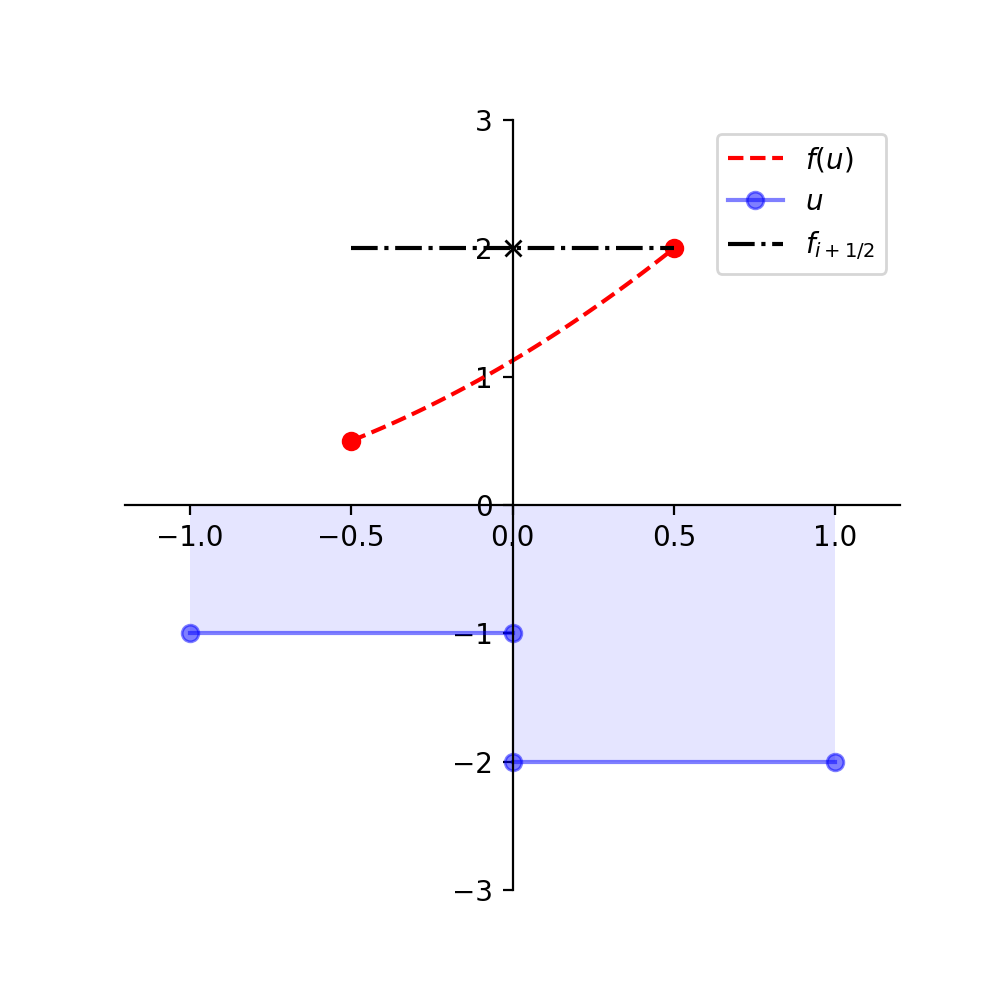

         u_left: -1.00
        u_right: -2.00
      Flux_left: 0.50
     Flux_right: 2.00

        ul > ur: max(Flux_left, Flux_right)

     Flux_i+1/2: 2.00


In [5]:
ul = np.array([-1])
ur = np.array([-2])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


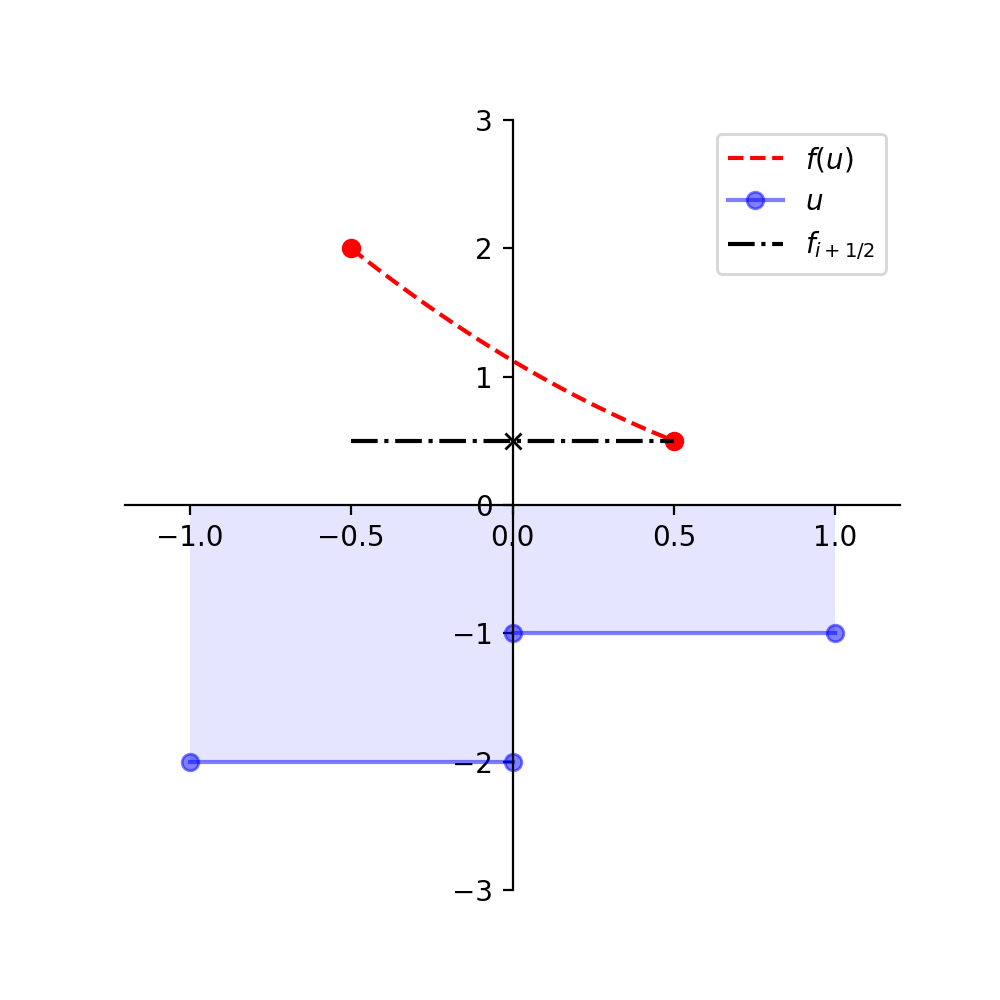

         u_left: -2.00
        u_right: -1.00
      Flux_left: 2.00
     Flux_right: 0.50

        ul ≤ ur: min(Flux_left, Flux_right)

     Flux_i+1/2: 0.50


In [6]:
ul = np.array([-2])
ur = np.array([-1])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


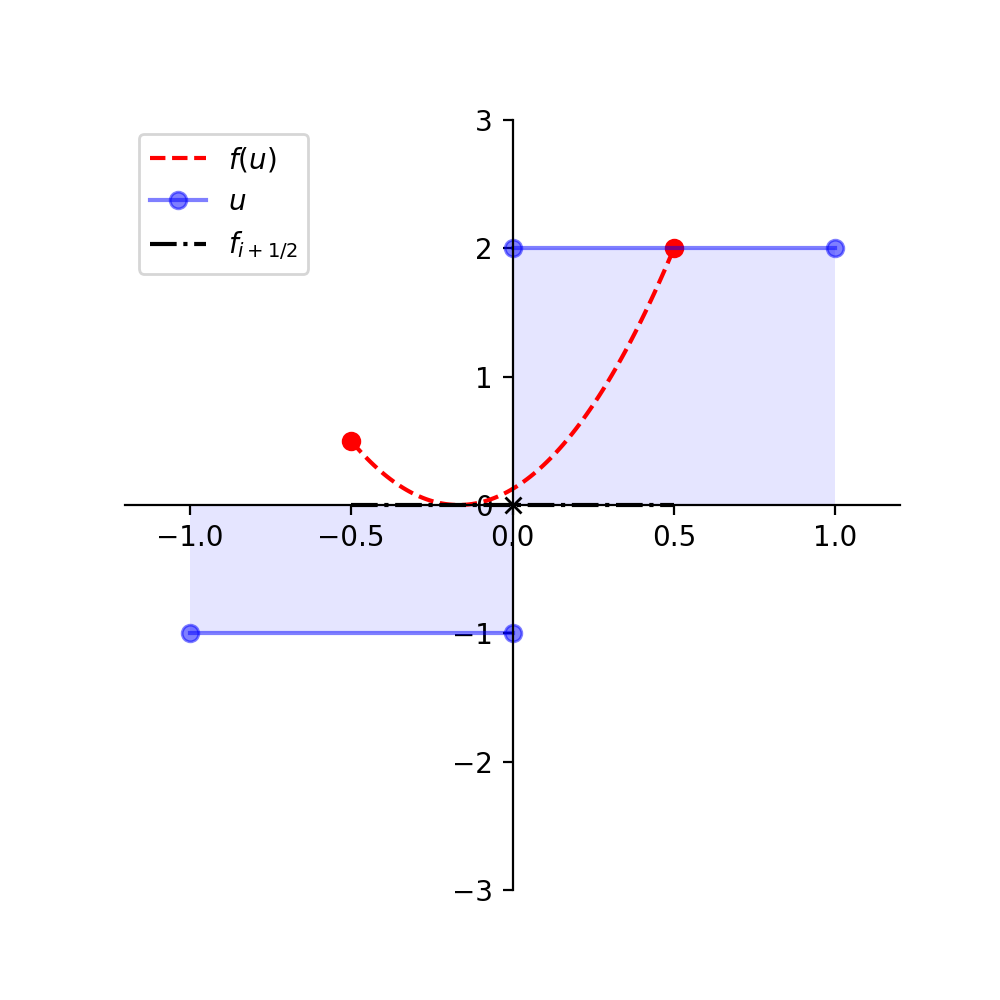

         u_left: -1.00
        u_right: 2.00
      Flux_left: 0.50
     Flux_right: 2.00

ul ≤ 0 & ur > 0: Flux_min

     Flux_i+1/2: 0.00


In [7]:
ul = np.array([-1])
ur = np.array([2])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


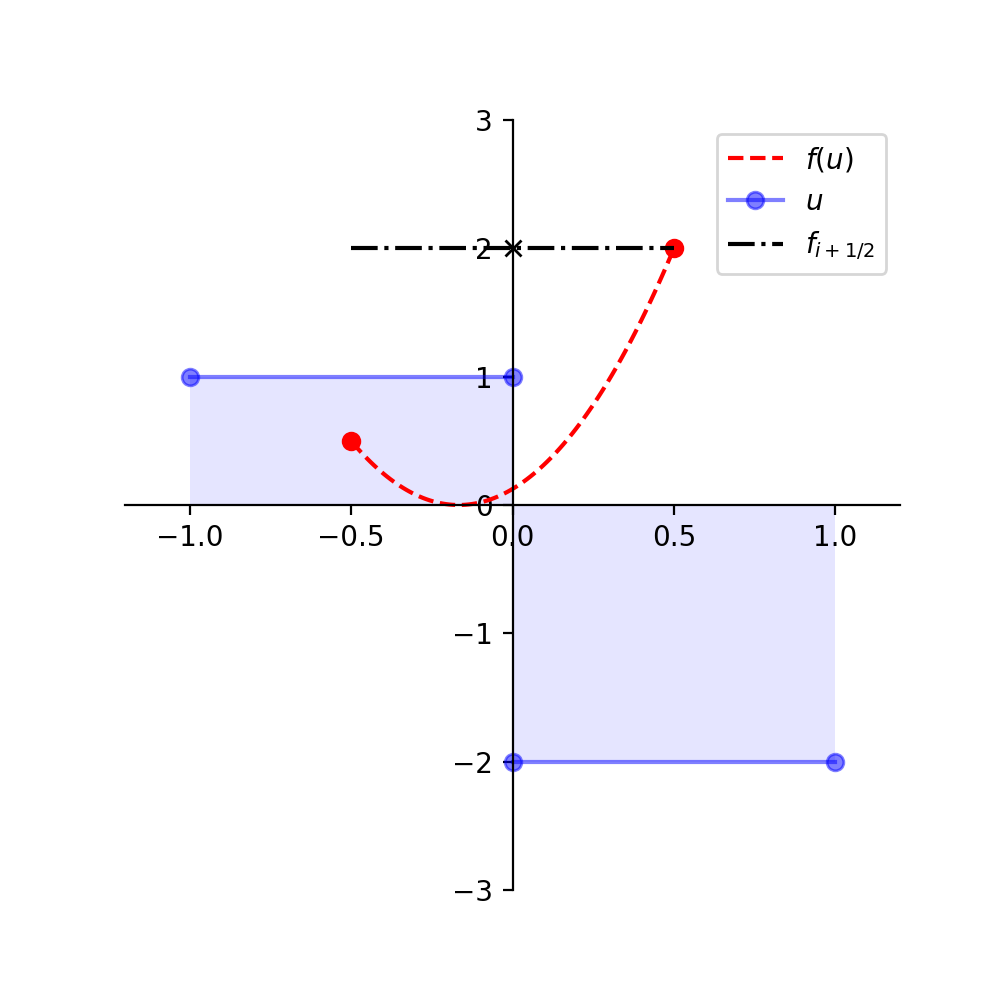

         u_left: 1.00
        u_right: -2.00
      Flux_left: 0.50
     Flux_right: 2.00

        ul > ur: max(Flux_left, Flux_right)

     Flux_i+1/2: 2.00


In [8]:
ul = np.array([1])
ur = np.array([-2])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


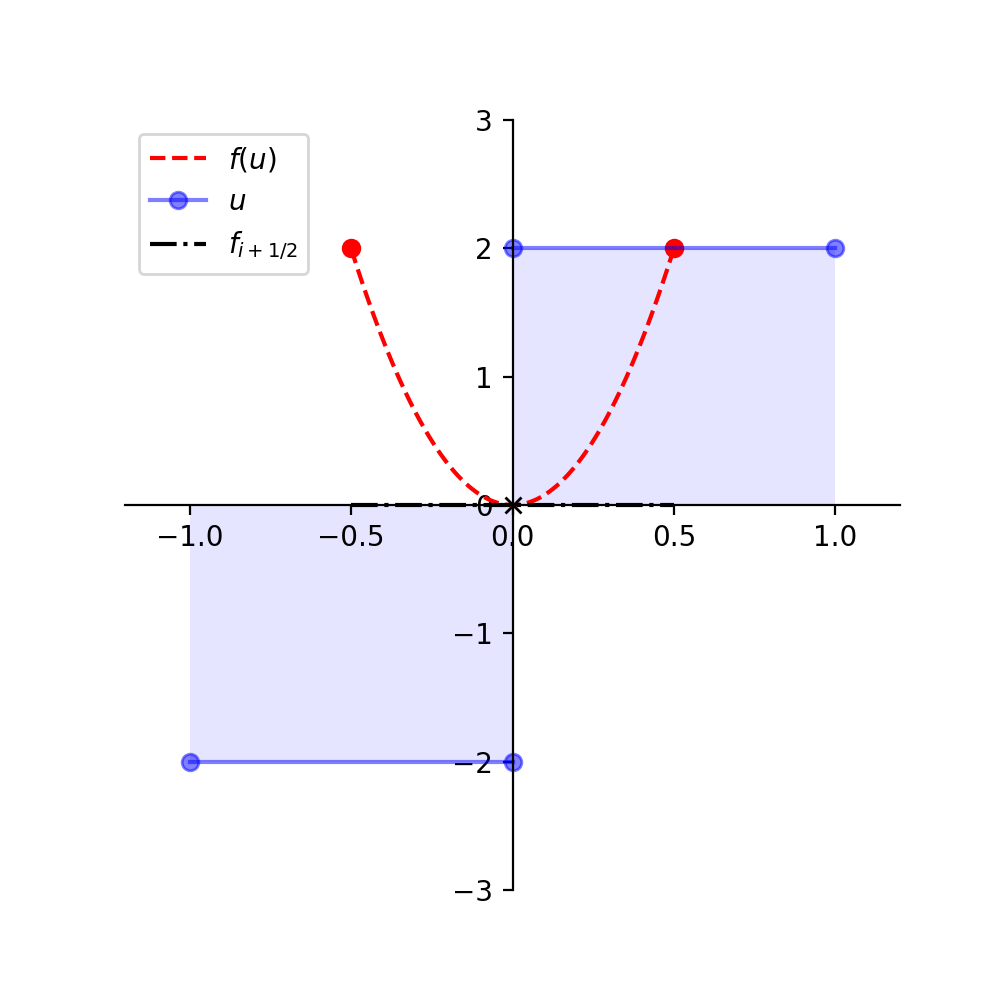

         u_left: -2.00
        u_right: 2.00
      Flux_left: 2.00
     Flux_right: 2.00

ul ≤ 0 & ur > 0: Flux_min

     Flux_i+1/2: 0.00


In [9]:
ul = np.array([-2])
ur = np.array([2])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


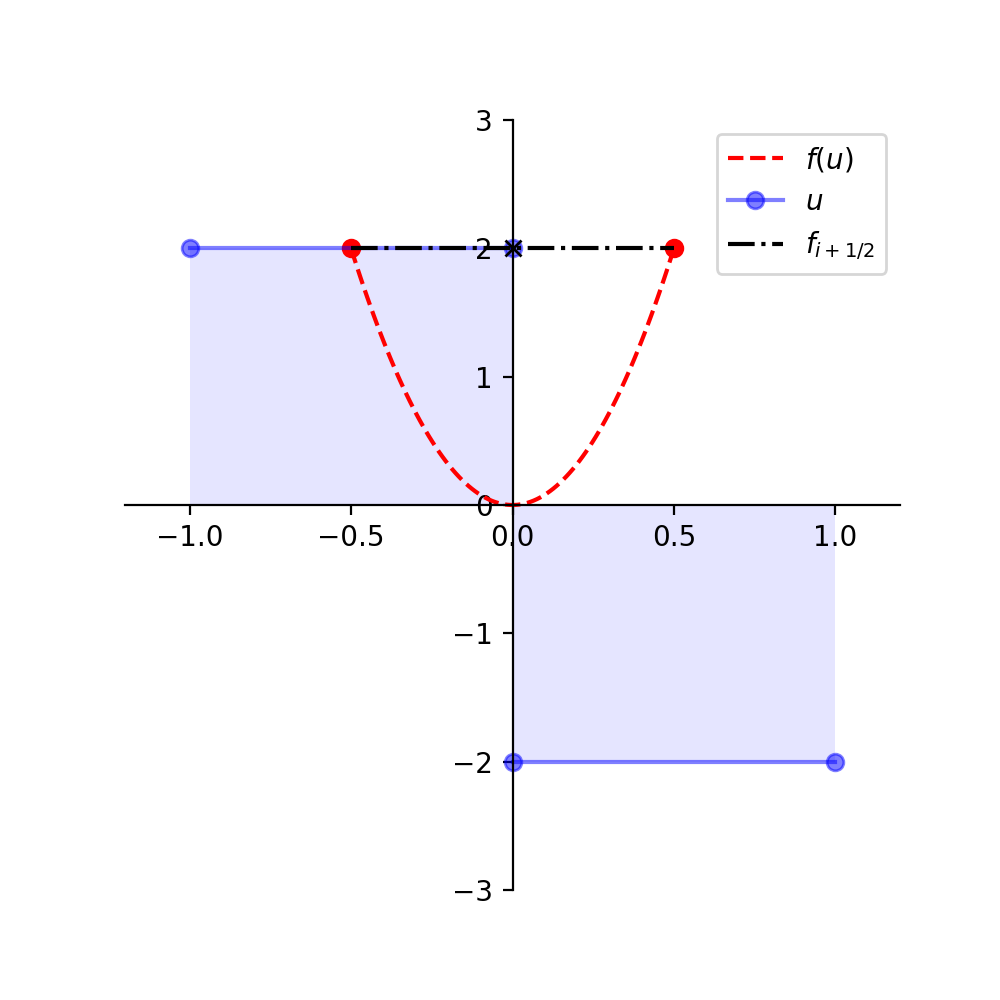

         u_left: 2.00
        u_right: -2.00
      Flux_left: 2.00
     Flux_right: 2.00

        ul > ur: max(Flux_left, Flux_right)

     Flux_i+1/2: 2.00


In [10]:
ul = np.array([2])
ur = np.array([-2])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


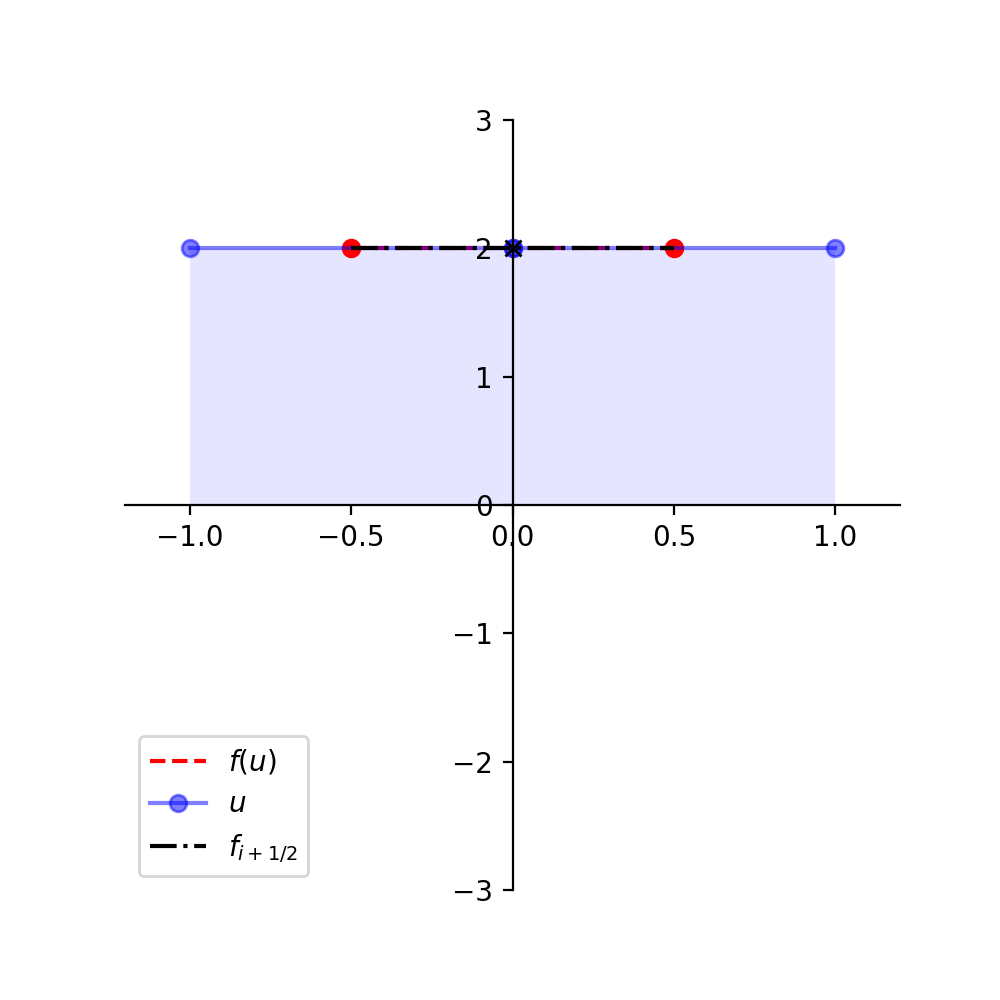

         u_left: 2.00
        u_right: 2.00
      Flux_left: 2.00
     Flux_right: 2.00

        ul ≤ ur: min(Flux_left, Flux_right)

     Flux_i+1/2: 2.00


In [11]:
ul = np.array([2])
ur = np.array([2])
godunov(ul, ur, with_plot=True)

<IPython.core.display.Javascript object>


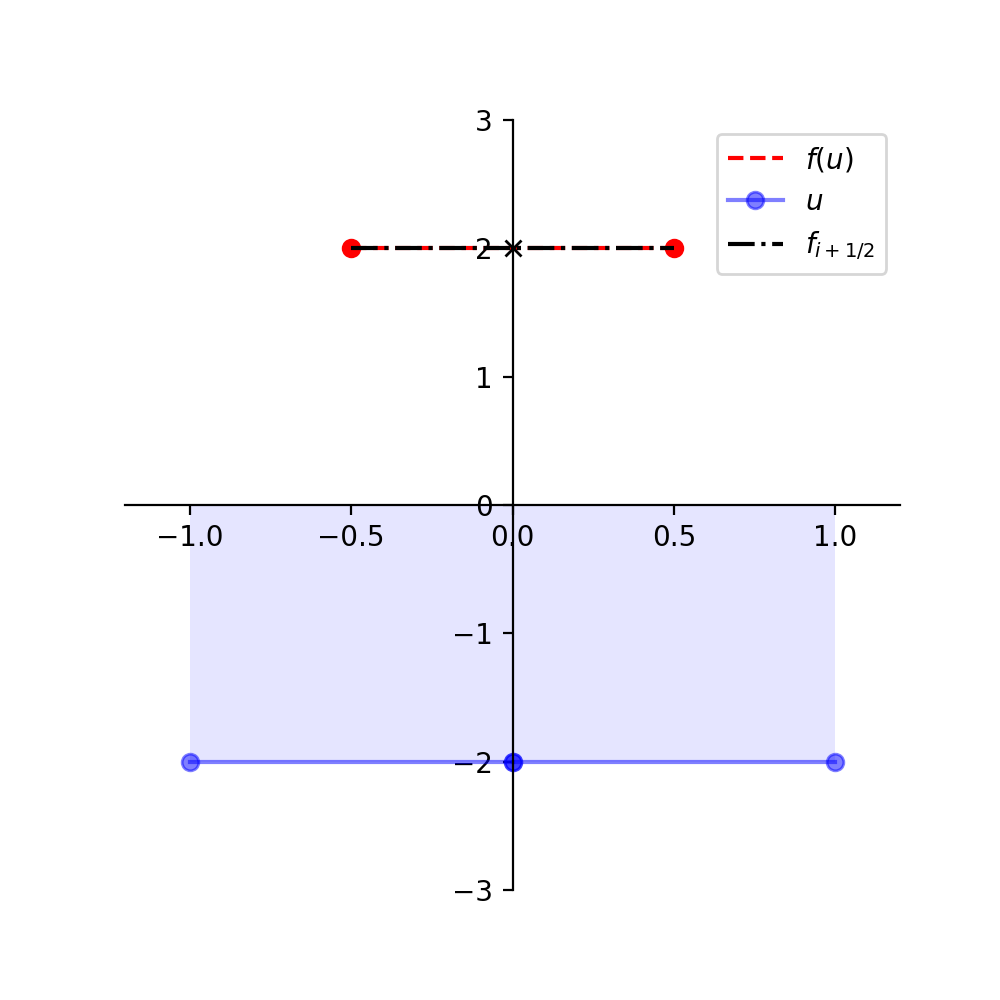

         u_left: -2.00
        u_right: -2.00
      Flux_left: 2.00
     Flux_right: 2.00

        ul ≤ ur: min(Flux_left, Flux_right)

     Flux_i+1/2: 2.00


In [12]:
ul = np.array([-2])
ur = np.array([-2])
godunov(ul, ur, with_plot=True)